<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/congenital%20glaucoma_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
import pandas as pd
import codecs
from scipy import stats
import numpy as np

In [73]:
csv_path = "/content/drive/MyDrive/進行中の研究/先天性緑内障プロジェクト/Cluster_analysis.csv"

#Open csv
#with codecs.open(csv_path, "r", "Shift-JIS", "ignore") as file:
with codecs.open(csv_path, "r", "UTF-8", "ignore") as file:
        df = pd.read_csv(file, index_col=None, header=0)

In [74]:
df

,Corneal_opacity,Asymmetry,Skin_lesion,Correct1_Incorrect0
0,0,0,0,1
1,0,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,1,0,1
5,1,1,0,1
6,1,1,0,1
7,0,1,0,1
8,1,0,0,1
9,0,1,1,1


#**K-meansでクラスタリング**

In [42]:
from sklearn import linear_model

# 目的変数のみ削除して変数Xに格納
X = df.drop(df.columns[[3, 4]], axis=1)
# 目的変数のみ抽出して変数Yに格納
Y = df[df.columns[[3]]]

In [44]:
model = linear_model.LinearRegression()
model.fit(X,Y)
model.coef_

array([[ 0.37210983, -0.09754335,  0.37861272]])

In [65]:
# 変数coefficientに係数の値を格納
coefficient = model.coef_
# データフレームに変換し、カラム名とインデックス名を指定
df_coefficient = pd.DataFrame(coefficient[0],
                              columns=["係数"],
                              index=df.columns[0:3].tolist())
df_coefficient

,係数
Corneal_opacity,0.372110
Asymmetry,-0.097543
Skin_lesion,0.378613


In [67]:
model.intercept_[0]


0.6054913294797688

In [68]:
model.score(X, Y)

0.2777456647398844

In [89]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
 
from sklearn.model_selection import train_test_split, GridSearchCV


In [90]:
FEATURE_COLS=df.columns.values[0:3].tolist()
FEATURE_COLS

['Corneal_opacity', 'Asymmetry', 'Skin_lesion']

In [91]:
OBJECTIVE_COL= df.columns.values[3]
OBJECTIVE_COL

'Correct1_Incorrect0'

In [92]:
# 訓練データとテストデータに分割する。
from sklearn.model_selection import train_test_split
# TODO:層別サンプリング train, test = train_test_split(df, test_size=0.20, stratify=df["町区分"], random_state=100)
train, test = train_test_split(df, test_size=0.20,random_state=100)

X_train = df[FEATURE_COLS]
Y_train = df[OBJECTIVE_COL]
X_test = test[FEATURE_COLS]
Y_test = test[OBJECTIVE_COL]

In [96]:
#Create model
clf = RFC(verbose=True,       # 学習中にログを表示します。この指定はなくてもOK
          n_jobs=-1,          # 複数のCPUコアを使って並列に学習します。-1は最大値。
          random_state=2525)  # 乱数のシードです。
clf.fit(X_train, Y_train)

print(f"acc: {clf.score(X_test, Y_test)}")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


acc: 1.0


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


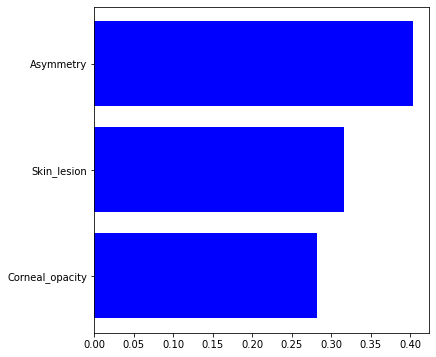

,features,importances
0,Asymmetry,0.403109
1,Skin_lesion,0.315638
2,Corneal_opacity,0.281253


In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()


feature_importances = pd.DataFrame([features, importances]).T
feature_importances.columns = ['features', 'importances']
df_s = feature_importances.sort_values('importances', ascending=False).reset_index(drop=True)
df_s

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
! pip install dtreeviz
from dtreeviz.trees import *

     |████████████████████████████████| 61 kB 1.3 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.3-py3-none-any.whl size=67113 sha256=9090d2f7b01b2816d20f7cc44e1146545c9e311b7ba9780fcb2fca0c592c810a
  Stored in directory: /root/.cache/pip/wheels/58/9d/65/e57deb90bf5440945d74bc4c19ebb14a0de2ed2b508c609673
Successfully built dtreeviz


In [101]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3)

rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3)

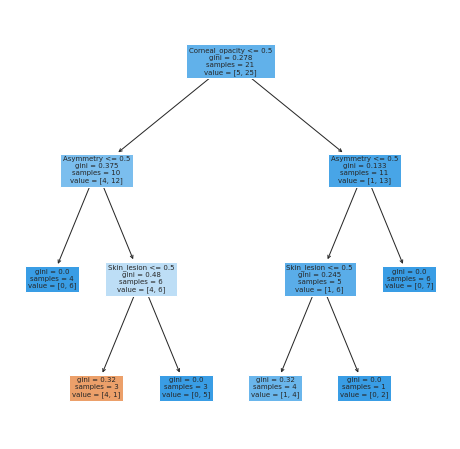

In [108]:
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont:

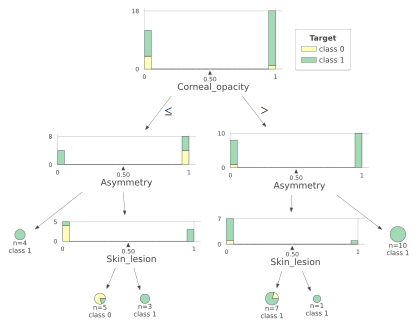

In [109]:
# dtreeviz decision tree 
dtreeviz(rf.estimators_[0], X_train, Y_train, feature_names=X_train.columns, target_name="Target")